<a href="https://colab.research.google.com/github/Rutvikshah47/Breast-Cancer-Prediction/blob/master/Enhanced_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.spatial import distance
from scipy.spatial import distance_matrix
import numpy
import pandas as pd

In [0]:
downloaded = drive.CreateFile({'id': '1aDd32ZfPn-xRhy7vBsg1OqQSKgg3MP0j'}) 
downloaded.GetContentFile('BC_v1.csv')  
df_v1 = pd.read_csv('BC_v1.csv')

#To write csv in drive
'''
df_v16.to_csv('v16.csv', index=False)

upload = drive.CreateFile({'title': 'v16.csv'})
upload.SetContentFile('v16.csv')
upload.Upload()
'''
# Dataset is now stored in a Pandas Dataframe

"\ndf_v16.to_csv('v16.csv', index=False)\n\nupload = drive.CreateFile({'title': 'v16.csv'})\nupload.SetContentFile('v16.csv')\nupload.Upload()\n"

In [0]:
df_v1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [0]:
X=df_v1.drop(["Unnamed: 32","diagnosis"],axis=1)
y=df_v1.diagnosis
X['Cluster'] = pd.Series( index=X.index)
X['Min Distance'] = pd.Series( index=X.index)
X['id']=list(range(0,len(X)))
#X['e'][0]=1
X.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster,Min Distance
0,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,NaN
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,NaN


In [0]:
#Feature Scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
#X_train.shape

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
y_train=pd.DataFrame(y_train)
y_train['id']=X_train.id
y_train.columns
y_test=pd.DataFrame(y_test)
y_test['id']=X_test.id
y_train.columns
y_test.columns
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[X_train.columns[1:31]] = sc.fit_transform(X_train[X_train.columns[1:31]])
X_test[X_test.columns[1:31]] = sc.transform(X_test[X_test.columns[1:31]])
#X_train.shape
temp_Xt=X_train.copy()
temp_yt=y_train.copy()


In [0]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster,Min Distance
149,149,-0.123490,-0.296801,-0.170507,-0.208616,-1.201680,-0.773170,-0.762312,-0.933241,-1.229949,...,-0.307910,-0.273576,-1.507424,-0.449260,-0.572239,-0.840822,-0.856362,-0.765748,NaN,NaN
124,124,-0.228268,-0.657951,-0.253775,-0.296503,-1.804637,-0.587616,-0.091985,-0.542684,-1.419985,...,-0.465287,-0.438127,-1.273017,0.027042,0.318045,-0.377067,-1.341582,-0.414807,NaN,NaN
421,421,0.145534,-1.230564,0.245833,-0.010242,0.519184,1.570006,0.732320,0.386583,1.054201,...,0.203869,-0.127445,-0.024877,0.770802,0.272612,-0.047627,-0.089971,0.488264,NaN,NaN
195,195,-0.358532,-0.672207,-0.400937,-0.400014,-1.203862,-0.970650,-0.634704,-0.654992,0.096572,...,-0.501000,-0.493386,-0.959895,-0.663496,-0.470142,-0.493515,0.226547,-0.802899,NaN,NaN
545,545,-0.157472,0.967224,-0.208843,-0.241538,-0.254695,-0.700630,-0.750349,-0.637469,-0.518248,...,-0.296107,-0.266734,-0.442374,-0.656085,-0.835138,-0.659802,-0.387208,-0.800613,NaN,NaN


In [0]:
#enhanced k-means
#phase 1 : find centroids
pd.options.mode.chained_assignment=None

mat=distance_matrix(X_train[X_train.columns[1:31]],X_train[X_train.columns[1:31]])
numpy.fill_diagonal(mat, numpy.inf)
#print(mat.shape)
z=numpy.where(mat==mat.min())
print(z)
#d1=X.iloc[z[0][0]]["id"]
d1=X_train.iloc[z[0][0], X_train.columns.get_loc('id')]
#d2=X.iloc[z[0][1]]["id"]
d2=X_train.iloc[z[0][1], X_train.columns.get_loc('id')]
t1=X_train[X_train["id"]==d1]
t2=X_train[X_train["id"]==d2]
m1=t1
m1=m1.append(t2)

X_train.drop(X_train[X_train["id"]==d1].index,inplace=True)
X_train.drop(X_train[X_train["id"]==d2].index,inplace=True)
print(d1,d2)
#print(m1)

#closest_points = numpy.argmin(dm,axis=0)
#print(closest_points)

(array([ 20, 221]), array([221,  20]))
497 107


In [0]:
#iloc is changed after dropping the row
print(mat.min())
print(distance.euclidean(t1[t1.columns[1:31]],t2[t2.columns[1:31]]))
print(z[0][0])
d1=X_train.iloc[z[0][0], X_train.columns.get_loc('id')]
X_train[X_train["id"]==d1]


1.2334263394495053
1.2334263394495053
20


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster,Min Distance
301,301,-0.485964,0.173644,-0.487503,-0.525846,-0.832923,-0.037212,-0.254325,-0.463298,-0.082285,...,-0.58211,-0.579872,-1.164294,-0.224246,-0.398674,-0.589118,-0.318121,-0.337075,NaN,NaN


In [0]:
#no of iteration for m1
n=len(X_train)
k=2
alpha=0.75
limit=alpha*(n/k)
limit=numpy.ceil(limit)
limit=int(limit)
limit
#here k=2 so m1 and m2 will be prodeuced

149

In [0]:
for i in range(2,limit):
  mat=distance_matrix(m1[m1.columns[1:31]],X_train[X_train.columns[1:31]])
  #sum_v=mat.sum()
  sum_v=mat.sum(axis=0)
  #print(sum_v.shape)
  #print(X_train[X_train.columns[1:31]].shape)
  #print(mat.shape)
  z=numpy.where(sum_v==sum_v.min())
  d1=X_train.iloc[z[0][0], X_train.columns.get_loc('id')]
  t1=X_train[X_train["id"]==d1]
  m1=m1.append(t1)
  X_train.drop(X_train[X_train["id"]==d1].index,inplace=True)
  #print(X.shape)

In [0]:
print(sum_v.min())
#print(sum_v)
#print(sum_v.shape)
#print(distance.euclidean(sum_v,X[X["id"]==d1][X.columns[1:31]]))
#X[X["id"]==d1]
X_train.shape

611.9445347942043


(249, 33)

In [0]:
#Second cluster

mat=distance_matrix(X_train[X_train.columns[1:31]],X_train[X_train.columns[1:31]])
numpy.fill_diagonal(mat, numpy.inf)
#print(mat.shape)
z=numpy.where(mat==mat.min())
#print(z)
#d1=X.iloc[z[0][0]]["id"]
d1=X_train.iloc[z[0][0], X_train.columns.get_loc('id')]
#d2=X.iloc[z[0][1]]["id"]
d2=X_train.iloc[z[0][1], X_train.columns.get_loc('id')]
t1=X_train[X_train["id"]==d1]
t2=X_train[X_train["id"]==d2]
m2=t1
m2=m2.append(t2)

X_train.drop(X_train[X_train["id"]==d1].index,inplace=True)
X_train.drop(X_train[X_train["id"]==d2].index,inplace=True)
print(d1,d2)



253 317


In [0]:
#iloc is changed after dropping the row
print(mat.min())
print(distance.euclidean(t1[t1.columns[1:31]],t2[t2.columns[1:31]]))
m2

1.4323944705571836
1.4323944705571836


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster,Min Distance
253,253,0.884642,-0.494008,0.855092,0.748935,0.351898,0.015580,0.495628,0.931664,0.036953,...,0.712319,0.596719,0.427410,-0.057844,0.353779,1.126258,0.409710,-0.137599,NaN,NaN
317,317,1.145170,-0.068707,1.090056,1.024594,0.108970,0.164179,0.320682,0.824666,0.014596,...,1.014967,1.058093,0.505691,0.183339,0.596259,0.999309,-0.114071,-0.089016,NaN,NaN


In [0]:
print(mat.min())
print(distance.euclidean(X[X["id"]==d1][X.columns[1:31]],X[X["id"]==d2][X.columns[1:31]]))
X_train.shape

1.4323944705571836
281.6102888605182


(247, 33)

In [0]:
for i in range(2,limit):
  mat=distance_matrix(m2[m2.columns[1:31]],X_train[X_train.columns[1:31]])
  #sum_v=mat.sum()
  sum_v=mat.sum(axis=0)
  #print(sum_v.shape)
  #print(X_train[X_train.columns[1:31]].shape)
  #print(mat.shape)
  z=numpy.where(sum_v==sum_v.min())
  d1=X_train.iloc[z[0][0], X_train.columns.get_loc('id')]
  t1=X_train[X_train["id"]==d1]
  m2=m2.append(t1)
  X_train.drop(X_train[X_train["id"]==d1].index,inplace=True)
  #print(X.shape)

In [0]:
print(m1.shape)
print(m2.shape)
print(X_train.shape)
centroid1=m1[m1.columns[1:31]].mean(axis=0)
centroid2=m2[m2.columns[1:31]].mean(axis=0)
print(centroid1)
print(centroid2)
#ce=centroid1
#ce=ce.append(centroid2)


(149, 33)
(149, 33)
(100, 33)
radius_mean               -0.422898
texture_mean              -0.493849
perimeter_mean            -0.450580
area_mean                 -0.440860
smoothness_mean           -0.421303
compactness_mean          -0.654907
concavity_mean            -0.671410
concave points_mean       -0.652209
symmetry_mean             -0.439598
fractal_dimension_mean    -0.342520
radius_se                 -0.497529
texture_se                -0.398437
perimeter_se              -0.507280
area_se                   -0.410570
smoothness_se             -0.317639
compactness_se            -0.555290
concavity_se              -0.481711
concave points_se         -0.600282
symmetry_se               -0.312176
fractal_dimension_se      -0.466967
radius_worst              -0.461867
texture_worst             -0.427908
perimeter_worst           -0.488088
area_worst                -0.466371
smoothness_worst          -0.332585
compactness_worst         -0.553975
concavity_worst           -0.61012

In [0]:
#for phase 2 
pcentroid1=centroid1.copy()
pcentroid2=centroid2.copy()
X_train=temp_Xt.copy()
y_train=temp_yt.copy()
X_train.shape

(398, 33)

In [0]:
#phase 2: as normal k-means not enhanced
#Assign data points
#first data assignment
limit=len(X_train)
pd.options.mode.chained_assignment=None

for i in X_train.id:
      row=X_train[X_train.id==i][X_train.columns[1:31]]

      d1=distance.euclidean(row,centroid1)
      d2=distance.euclidean(row,centroid2)
      minm=1   #c1 is selected
      mind=d1
      if (d2<d1):
        minm=2 #c2 is selected
        mind=d2
      
      X_train.loc[X_train.id==i,'Cluster'] = minm
      X_train.loc[X_train.id==i,'Min Distance'] = mind


In [0]:
centroid1=X_train[X_train["Cluster"]==1.0][X_train.columns[1:31]].mean(axis=0)
centroid2=X_train[X_train["Cluster"]==2.0][X_train.columns[1:31]].mean(axis=0)
print(centroid1)
print(centroid2)

radius_mean               -0.530757
texture_mean              -0.332122
perimeter_mean            -0.555569
area_mean                 -0.514251
smoothness_mean           -0.394303
compactness_mean          -0.680517
concavity_mean            -0.696317
concave points_mean       -0.700770
symmetry_mean             -0.408757
fractal_dimension_mean    -0.223819
radius_se                 -0.431485
texture_se                -0.073229
perimeter_se              -0.447869
area_se                   -0.392790
smoothness_se             -0.089213
compactness_se            -0.495893
concavity_se              -0.449697
concave points_se         -0.538945
symmetry_se               -0.097864
fractal_dimension_se      -0.346932
radius_worst              -0.567243
texture_worst             -0.356543
perimeter_worst           -0.593367
area_worst                -0.534539
smoothness_worst          -0.413610
compactness_worst         -0.636344
concavity_worst           -0.693924
concave points_worst      -0

In [0]:
#data assignment in iteration
limit=len(X_train)

pd.options.mode.chained_assignment=None
for j in range(0,10):
  #print(b1,m1,b2,m2)
  
  b1=0
  m1=0
  b2=0
  m2=0
  for i in X_train.id:
      row=X_train[X_train.id==i][X_train.columns[1:31]]
      #pcluster=X_train.iloc[i, X_train.columns.get_loc('Cluster')]
      pcluster=X_train.loc[X_train.id==i,'Cluster'] 
      if(all(pcluster==1.0)):
        temp=centroid1
      elif(all(pcluster==2.0)): 
        temp=centroid2
      dtemp=distance.euclidean(row,temp)
      if(all(dtemp<=X_train.loc[X_train.id==i,'Min Distance'])):
        X_train.loc[X_train.id==i,'Cluster'] = pcluster
        X_train.loc[X_train.id==i,'Min Distance'] = dtemp
        
      elif(all(dtemp>X_train.loc[X_train.id==i,'Min Distance'])):
        d1=distance.euclidean(row,centroid1)
        d2=distance.euclidean(row,centroid2)
        minm=1   #c1 is selected
        mind=d1
        if (d2<d1):
          minm=2 #c2 is selected
          mind=d2
        X_train.loc[X_train.id==i,'Cluster'] = minm
        X_train.loc[X_train.id==i,'Min Distance'] = mind
      c=X_train[X_train.id==i].Cluster
      #print(c)
      #print(d1,d2)
      if(all(y_train.loc[y_train.id==i,'diagnosis'] =='M')):
        if(all(c==1.0)):
          m1=m1+1
        elif(all(c==2.0)):
          m2=m2+1
      if(all(y_train.loc[y_train.id==i,'diagnosis'] =='B')):
        if(all(c==1.0)):
          b1=b1+1
        elif(all(c==2.0)):
          b2=b2+1
      #print(X.Cluster.value_counts())
  pc1=centroid1
  pc2=centroid2
  centroid1=X_train[X_train["Cluster"]==1.0][X_train.columns[1:31]].mean(axis=0)
  centroid2=X_train[X_train["Cluster"]==2.0][X_train.columns[1:31]].mean(axis=0)
  
  if(centroid1.equals(pc1)==True and centroid2.equals(pc2)==True):
    break
  if(centroid1.equals(pc1)==False and centroid2.equals(pc2)==False):
    print("No")
  
  print(X_train.Cluster.value_counts())
  #input()


No
1.0    246
2.0    152
Name: Cluster, dtype: int64
No
1.0    256
2.0    142
Name: Cluster, dtype: int64
No
1.0    261
2.0    137
Name: Cluster, dtype: int64
No
1.0    262
2.0    136
Name: Cluster, dtype: int64


In [0]:
print("No of Iteration:",j)
print(b1,m1,b2,m2)

No of Iteration: 4
237 25 12 124


In [0]:
#mannual way
b1=0
m1=0
b2=0
m2=0
for i in X_train.id:
  c=X_train[X_train.id==i].Cluster
  if(all(y_train.loc[y_train.id==i,'diagnosis'] =='M')):
        if(all(c==1.0)):
          m1=m1+1
        elif(all(c==2.0)):
          m2=m2+1
  if(all(y_train.loc[y_train.id==i,'diagnosis'] =='B')):
        if(all(c==1.0)):
          b1=b1+1
        elif(all(c==2.0)):
          b2=b2+1
print(b1,m1,b2,m2)    

237 25 12 124


In [0]:
if(b1<=m1): 
  c1="M"
else:
  c1="B"
if(b2<=m2):
  c2="M"
else:
  c2="B"
  
for i in X_train.id:
  c=X_train[X_train.id==i].Cluster
  
  if(all(c==1.0)):
    X_train.loc[X_train.id==i,'Cluster']=c1
  if(all(c==2.0)):
    X_train.loc[X_train.id==i,'Cluster']=c2

In [0]:
print(c1,c2)
print(X_train.Cluster.value_counts())

B M
B    262
M    136
Name: Cluster, dtype: int64


In [0]:
#Model Training is over 
#Testing with test data
y_pred=list()
for i in X_test.id:
  row=X_test[X_test.id==i][X_test.columns[1:31]]
  d1=distance.euclidean(row,centroid1)
  d2=distance.euclidean(row,centroid2)
  minm=c1   #c1 is selected
  if (d2<d1):
    minm=c2 #c2 is selected
  y_pred.append(minm) 
y_pred=pd.Series(y_pred)
print(y_pred.shape)
print(y_test.shape)

(171,)
(171, 2)


In [0]:
#B=0 , M=1
y_t=list()
y_p=list()
for i in y_test.id:
  row=y_test.loc[y_test.id==i,'diagnosis']
  if(all(row =='B')):
    y_t.append(0)
  if(all(row=='M')):
    y_t.append(1)
    
for i in y_pred:
  row=i
  if(row=='B'):
    y_p.append(0)
  if(row=='M'):
    y_p.append(1)


In [0]:
Accuracy=metrics.accuracy_score(y_t, y_p)
print("Accuracy:",Accuracy)
print(sklearn.metrics.accuracy_score(y_t,y_p,normalize=False))
print(sklearn.metrics.confusion_matrix(y_t,y_p))
print(sklearn.metrics.f1_score(y_t,y_p))

Accuracy: 0.9064327485380117
155
[[102   6]
 [ 10  53]]
0.8688524590163935


B    262
M    136
Name: Cluster, dtype: int64

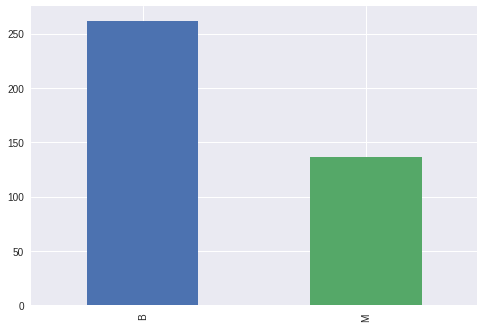

In [0]:
X_train.Cluster.value_counts().plot(kind='bar')
X_train.Cluster.value_counts()


In [0]:
y_test.diagnosis.value_counts()

B    108
M     63
Name: diagnosis, dtype: int64

In [0]:
y_pred.value_counts()

B    112
M     59
dtype: int64

In [0]:
numpy.save(open("Enhanced K-means Accuracy", 'wb'), Accuracy)